# How frequently have I been running these notebooks?

In [1]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from databuddy import get_data

In [2]:
git_log = !git log

In [3]:
dates = [line[8:] for line in git_log if line.startswith("Date")]

In [4]:
data = get_data()

In [5]:
dates_ind = pd.to_datetime(dates)

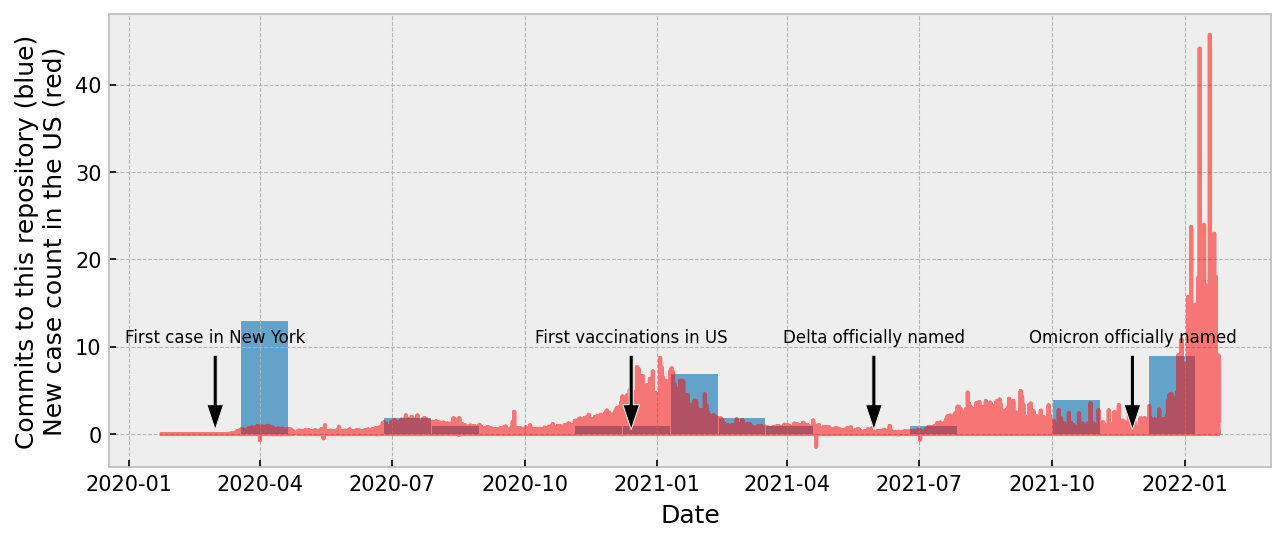

In [6]:
def add_text_annotation(text: str, date: str, ax: plt.Axes):
    ax.annotate(
        text,
        xy=(pd.to_datetime(date), 0),
        xytext=(pd.to_datetime(date), 10),
        # text size:
        fontsize=8,
        # centered at the top of the text:
        va="bottom",
        # horizontal alignment:
        ha="center",
        arrowprops=dict(
            facecolor="black", shrink=0.05, 
            width=2, headwidth=8,
        ),
    )

with plt.style.context("bmh"):
    plt.figure(figsize=(10, 4), dpi=150)
    plt.plot(data.created_at, data.new_case/70e2, c='r', alpha=0.5)
    sns.histplot(dates_ind, bins=20, ax=plt.gca())
    plt.ylabel("Commits to this repository (blue)\nNew case count in the US (red)")
    plt.xlabel("Date")

    add_text_annotation("First vaccinations in US", "2020-12-14", plt.gca())
    add_text_annotation("Omicron officially named", "2021-11-26", plt.gca())
    add_text_annotation("First case in New York", "2020-03-01", plt.gca())
    add_text_annotation("Delta officially named", "2021-05-31", plt.gca())